# <a href="https://thetahat.ru/courses/bm-hf-2025-spr" target="_top" >Математическая статистика (ФБМФ, ФМХФ)</a>
## Домашнее задание 1 &mdash; часть A

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_st_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются **вообще никак**, кроме случаев наличия уважительной причины.
* До дедлайна можно поменять решение любое количество раз. Начинайте точно так же сдавать задание, бот подскажет.
* Любую уважительную причину нужно подтвердить документально, отправив скан или фото боту. При этом работу можно сдать позже на столько дней, на сколько время ее действия пересекается с временем выполнения задания.
* Прислать нужно **ноутбук в формате ipynb**. Другие форматы не принимаются.
* Выполнять задание необходимо **полностью самостоятельно**. При обнаружении списывания **все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Простой или основной уровень вы выбираете самостоятельно, выполняя или не выполняя задания типа B. При выборе **простого уровня** достаточно выполнить задания *типа A*. При выборе **основного уровня** нужно выполнять *как задания типа A, так и задания типа B*.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек. Ячейки с assert'ами **удалять и изменять нельзя**, в противном случае соответствующее задание не будет оценено.
* Комментарии к решению пишите в markdown-ячейках.
* **Если код студента недописан и т.д., то он не оценивается.**
* Каждая задача стоит **5 баллов**.

_Замечание: перед выполнением задания можно ознакомиться с <a href="https://thetahat.ru/courses/bm-hf-2025-spr/stat/2/seminar2" target="_top" >ноутбуком с семинара</a>._


<font size="5">Данная часть задания проверяется автоматически. Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек. Ячейки с assert'ами <b>удалять и изменять нельзя</b>, в противном случае соответствующее задание *не будет оценено*.</font>


> *Примечание.* Рекомендуется работать с данным ноутбуком **локально** в <a href="https://thetahat.ru/files/bm-hf-2025-spr/stat/2/02_jupyter.html" target="_top">Jupyter Notebook</a> (например, используя <a href="https://thetahat.ru/files/bm-hf-2025-spr/stat/2/01_anaconda.html#Anaconda" target="_top">Anaconda</a> или <a href="https://thetahat.ru/files/bm-hf-2025-spr/stat/2/02_jupyter.html#6.-Другие-редакторы" target="_top">альтернативные варианты</a>). Если вы используете софт по типу Google Colaboratory, то перед отправкой боту данного ноутбука необходимо проверить, что **в ячейках с assert'ами и "# Ваше решение тут"** в метаданных присутствуют поля *metadata* с `nbgrader`. Можно открыть ноутбук с решением в текстовом редакторе (MS Word, Блокнот) и выполнить поиск по документу слова `nbgrader`. Если поиск показал ровно **25 совпадений** &mdash; можете отправлять файл боту. Если совпадений меньше, решение может быть не оценено. В таком случае попробуйте скачать файл в форме `ipynb` еще раз и перенесите решения в новый файл. **Внимание! Бот не проверяет решение и не проверяет наличие метаданных.** 

In [73]:
# Bot check

# HW_ID: st_1a
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [74]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
from scipy.special import factorial, gammaln

### Задача 1.1

Пусть $X_1, ..., X_n$ &mdash; выборка пуассоновского распределения $Pois(\theta)$, то есть $\mathsf{P}(X_i = k) = \frac{\theta^k}{k!} e^{-\theta}$ при $k \in \{0, 1, 2, ...\}$.
Реализуйте функции, вычисляющие:
* логарифм правдоподобия;
* градиент логарифма правдоподобия;
* оценку $\theta$ по методу максимального правдоподобия.

_Замечание: функция вычисления логарифма факториала уже реализована ниже_

*Примечание:* вам могут пригодиться методы библиотеки <a href="https://thetahat.ru/courses/python/03" target="_top">NumPy</a>  для работы с массивами и numpy.random или <a href="https://thetahat.ru/courses/python/05" target="_top" >scipy.stats</a> &mdash; со случайными величинами. Задача с семинара <a href="https://thetahat.ru/files/bm-hf-2025-spr/stat/2/seminar2.html#Задача-1." target="_top">о распределениях</a>.   Задача с семинара <a href="https://thetahat.ru/files/bm-hf-2025-spr/stat/2/seminar2.html#Задача-3."  target="_top">о работе с массивами.</a>

In [75]:
def logfactorial(x):
    return gammaln(x + 1)

In [76]:
def poiss_loglikelihood(x, theta):
    xx = np.array(x)
    L = np.sum(xx * np.log(theta) - theta - logfactorial(xx))
    return L

In [77]:
x = np.array([1, 2, 3])
assert round(poiss_loglikelihood(x, 1.9), 2) == -4.33
assert poiss_loglikelihood(x, 1.9) > poiss_loglikelihood(x, 4.2)

In [78]:
def poiss_loglikelihood_grad(x, theta):
    return np.sum(np.array(x)/theta - 1)

In [79]:
x = np.array([1, 2, 3])
assert round(poiss_loglikelihood_grad(x, 1.9), 2) == 0.16

In [80]:
def poiss_maxlikelihood_estimator(x):
    return np.mean(np.array(x))

In [81]:
x = np.array([1, 2, 3])
theta = poiss_maxlikelihood_estimator(x)
assert np.allclose(poiss_loglikelihood_grad(x, theta), 0)
assert np.allclose(poiss_maxlikelihood_estimator(x), 2)

### Задача 1.2

Дана выборка $X_1, ..., X_n$ из нормального распределения $\mathcal{N}(a, \sigma^2)$. Реализуйте функции, вычисляющие:
* логарифм правдоподобия для параметра $\theta = (a, \sigma)$;
* градиент логарифма правдоподобия $\theta$;
* оценку $\theta$ по методу максимального правдоподобия.

*Примечание:* вам могут пригодиться методы библиотеки <a href="https://thetahat.ru/courses/python/03" target="_top">NumPy</a>  для работы с массивами и numpy.random или <a href="https://thetahat.ru/courses/python/05" target="_top" >scipy.stats</a> &mdash; со случайными величинами. Задача с семинара <a href="https://thetahat.ru/files/bm-hf-2025-spr/stat/2/seminar2.html#Задача-1." target="_top">о распределениях</a>.   Задача с семинара <a href="https://thetahat.ru/files/bm-hf-2025-spr/stat/2/seminar2.html#Задача-3."  target="_top">о работе с массивами.</a>

In [82]:
def norm_loglikelihood(x, a, sigma):
    xx = np.array(x)
    return np.sum(-1*(xx-a)*(xx-a)/(2*pow(sigma, 2)) - 0.5*np.log(2*np.pi*pow(sigma,2)))

In [83]:
x = np.array([1, 2, 3])
assert round(norm_loglikelihood(x, 0, 1), 2) == -9.76
assert norm_loglikelihood(x, 0, 1) < norm_loglikelihood(x, 1, 1)
assert norm_loglikelihood(x, 0, 1) > norm_loglikelihood(x, 0, 100)

In [84]:
def norm_loglikelihood_grad(x, a, sigma):
    xx = np.array(x)
    n = xx.size
    a_ = np.sum(xx-a)/pow(sigma,2)
    sigma_ = -n/sigma+np.sum((xx-a)*(xx-a))/(pow(sigma,3))
    return np.array([a_, sigma_])

In [85]:
x = np.array([1, 2, 3])
assert np.allclose(norm_loglikelihood_grad(x, 1.9, 3), [0.03, -0.92], atol=0.01)

In [86]:
def norm_maxlikelihood_estimator(x):
    a_l = np.mean(np.array(x))
    sigma_l = np.sqrt(np.mean((np.array(x)-a_l)*(np.array(x)-a_l)))
    return a_l, sigma_l

In [87]:
x = np.array([1, 2, 3])
a, sigma = norm_maxlikelihood_estimator(x)
assert np.allclose(norm_loglikelihood_grad(x, a, sigma), 0)
assert np.allclose([a, sigma], [2.00, 0.82], atol=0.01)

---

__________________
### Задача 2.1
Даны 6 параметрических моделей &mdash; для каждой нужно реализовать подсчёт функции правдоподобия по небольшой выборке, чтобы затем построить график функции правдоподобия.

*a).* Параметрическая модель $\mathcal{N}(\theta, 1)$.

*b).* Параметрическая модель $Exp(\theta)$.

*c).* Параметрическая модель $U[0, \theta]$.

*d).* Параметрическая модель $Bin(5, \theta)$.

*e).* Параметрическая модель $Pois(\theta)$.

*f).* Параметрическая модель $Сauchy(\theta)$, где $\theta$ — параметр сдвига.

*Примечание:* вам могут пригодиться методы библиотеки <a href="https://thetahat.ru/courses/python/03" target="_top">NumPy</a>  для работы с массивами и numpy.random или <a href="https://thetahat.ru/courses/python/05" target="_top" >scipy.stats</a> &mdash; со случайными величинами. Для построения графиков используется <a href="https://thetahat.ru/courses/python/04" target="_top">Matplotlib</a>.

In [88]:
def calc_likelihood(dist_name, theta_grid, sample):
    theta_grid = theta_grid.reshape((-1, 1))
    sample = sample.reshape((1, -1))

    if dist_name == "normal":
        return sps.norm(loc=theta_grid).pdf(sample).prod(axis=1)
    elif dist_name == "expon":
        return sps.expon(loc=0, scale=theta_grid).pdf(sample).prod(axis=1)
    elif dist_name == "uniform":
        return sps.uniform(loc=0, scale=theta_grid).pdf(sample).prod(axis=1)
    elif dist_name == "binomial":
        return sps.binom(n=5, p=theta_grid).pmf(sample.astype(int)).prod(axis=1)
    elif dist_name == "poisson":
        return sps.poisson(mu=theta_grid).pmf(sample.astype(int)).prod(axis=1)
    elif dist_name == "cauchy":
        return sps.cauchy(loc=theta_grid, scale=1).pdf(sample).prod(axis=1)

    assert False

In [89]:
check_values = {
 'normal': {'sample': [-1, 1], 'theta': [1.0, 2.0], 'likelihood': [0.0215, 0.0011]},
 'expon': {'sample': [1, 2], 'theta': [6.0, 7.0], 'likelihood': [0.0168, 0.0133]},
 'uniform': {'sample': [0.2, 0.8], 'theta': [1.8, 2.1], 'likelihood': [0.3086, 0.2268]},
 'binomial': {'sample': [5, 5], 'theta': [0.6, 0.7], 'likelihood': [0.006, 0.0282]},
 'poisson': {'sample': [5, 10], 'theta': [6.04, 7.03], 'likelihood': [0.0068, 0.0091]},
 'cauchy': {'sample': [-0.5, 0.5], 'theta': [1.0, 2.0], 'likelihood': [0.0249, 0.0043]}
}
for dist_name, params in check_values.items():
    ans = calc_likelihood(dist_name, np.array(params["theta"]), np.array(params["sample"]))
    ref = np.array(params["likelihood"])
    assert ans.shape == ref.shape
    assert np.allclose(ans, ref, atol=1e-4)

Посмотрим на графики функций правдоподобия:

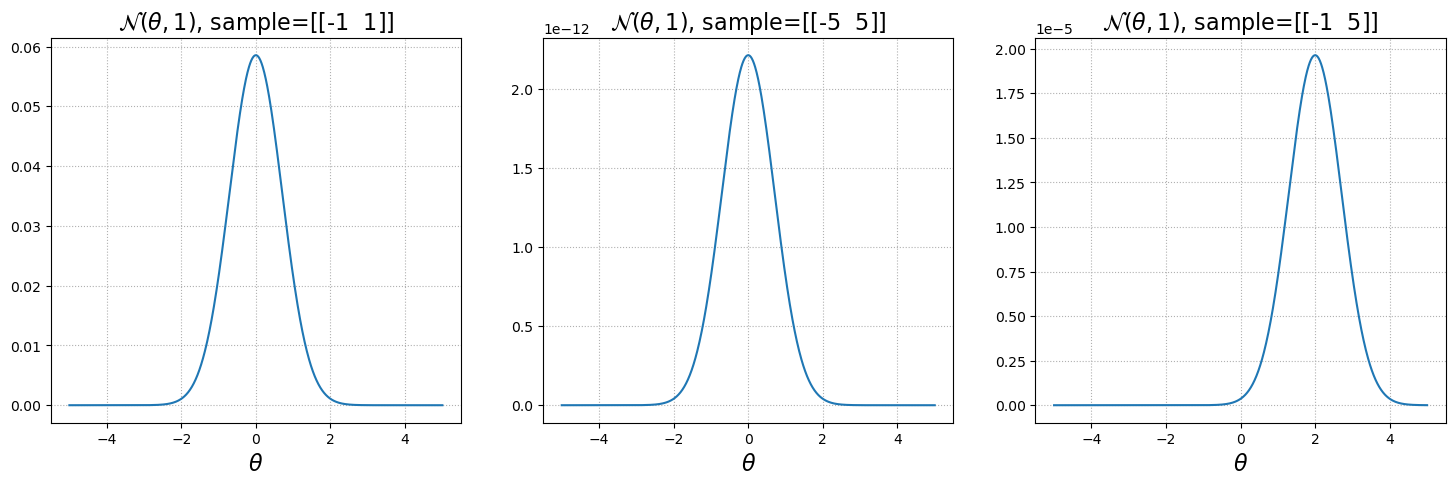

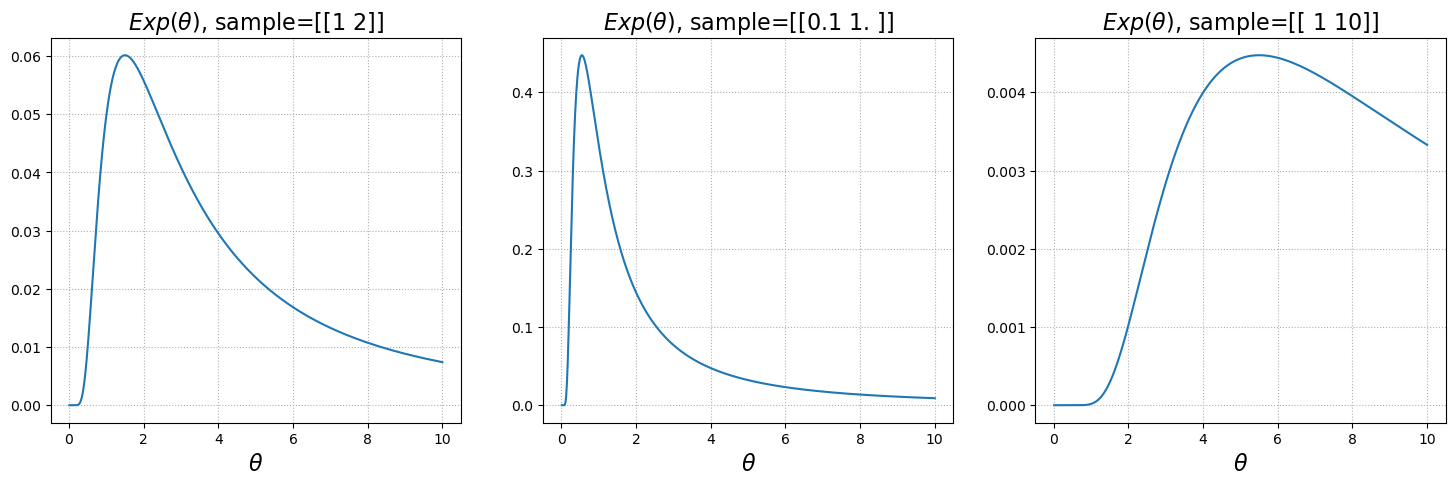

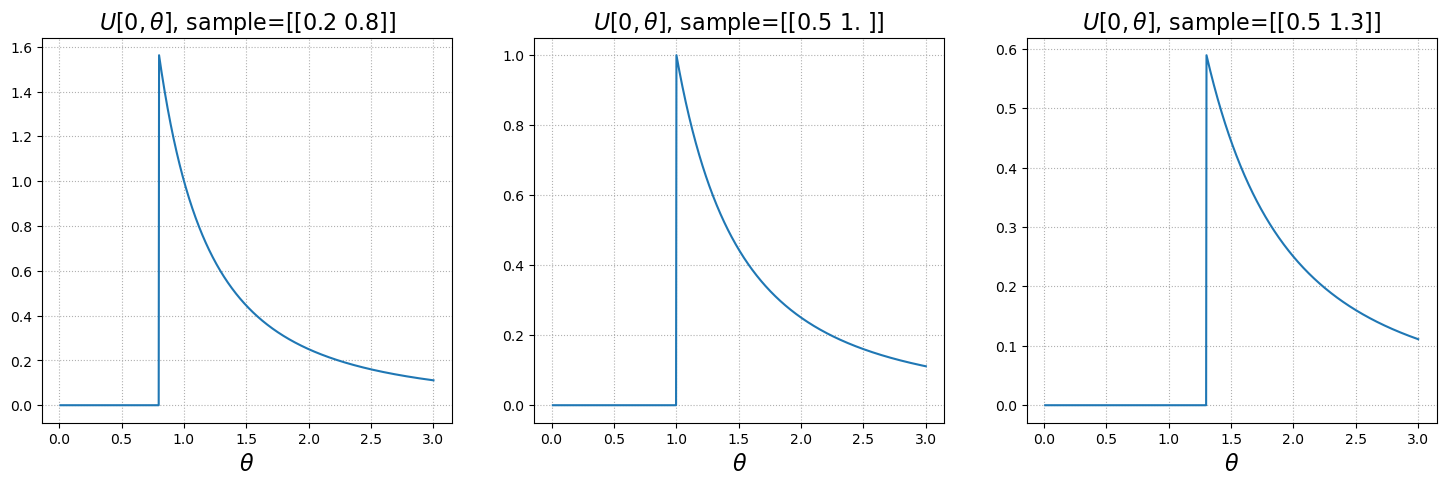

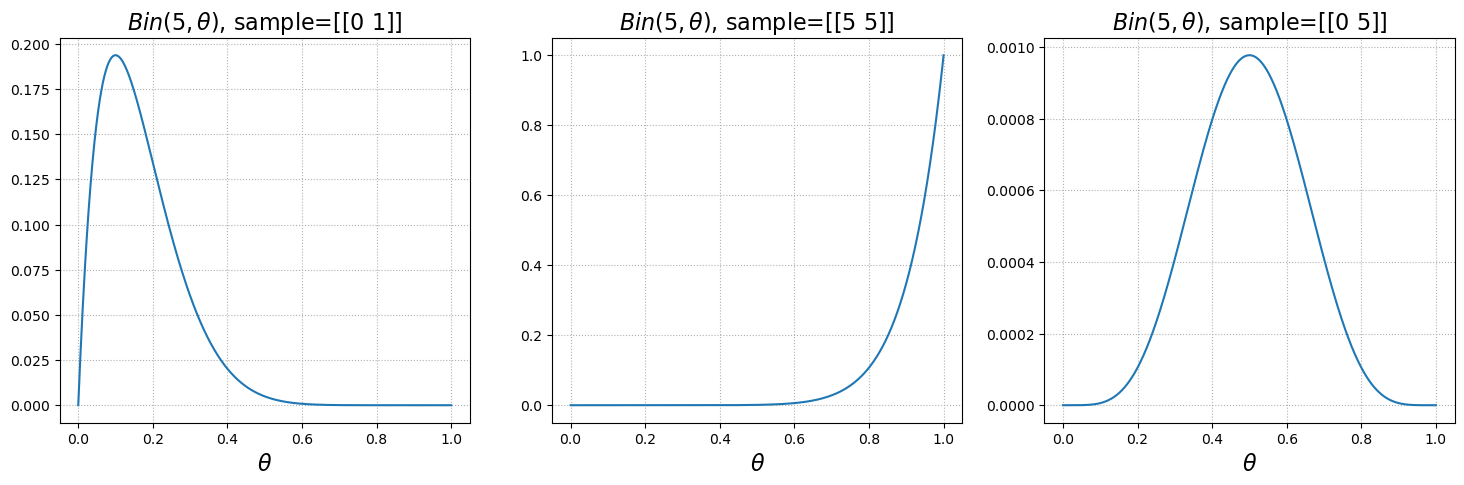

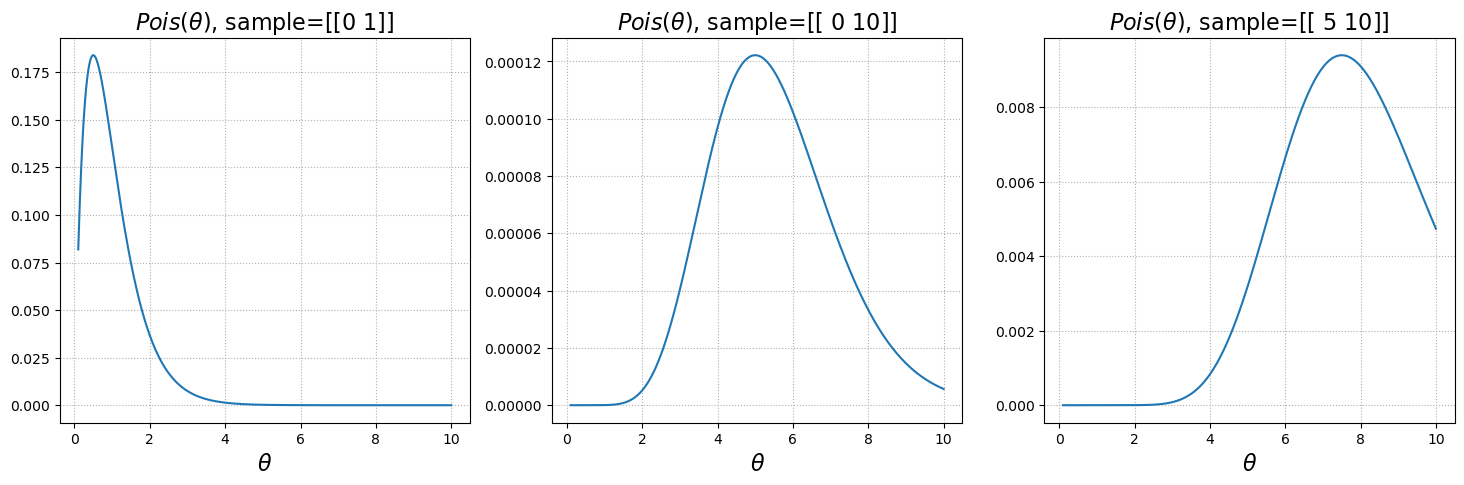

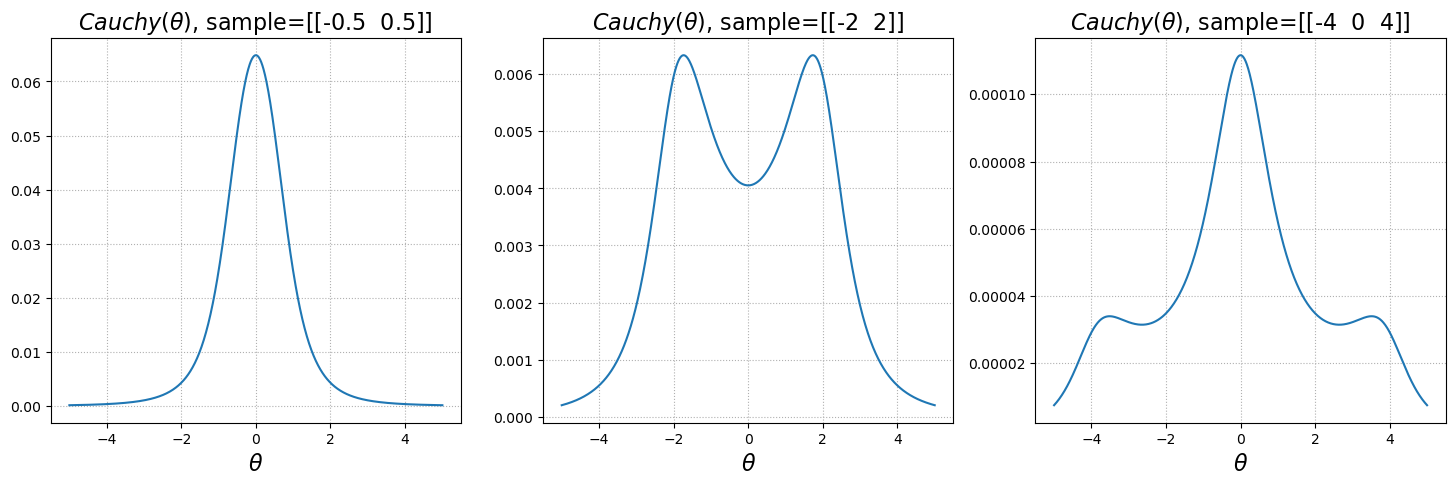

In [90]:
dist2samples = {
    "normal":   [[-1, 1], [-5, 5], [-1, 5]],
    "expon":    [[1, 2], [0.1, 1], [1, 10]],
    "uniform":  [[0.2, 0.8], [0.5, 1], [0.5, 1.3]],
    "binomial": [[0, 1], [5, 5], [0, 5]],
    "poisson":  [[0, 1], [0, 10], [5, 10]],
    "cauchy":   [[-0.5, 0.5], [-2, 2], [-4, 0, 4]],
}
dist2grid = {
    "normal":   np.linspace(-5, 5, 1000),
    "expon":    np.linspace(0.01, 10, 1000),
    "uniform":  np.linspace(0.01, 3, 1000),
    "binomial": np.linspace(0, 1, 1000),
    "poisson":  np.linspace(0.1, 10, 1000),
    "cauchy":   np.linspace(-5, 5, 1000),
}
dist2label = {
    "normal":   r"$\mathcal{N}(\theta, 1)$",
    "expon":    r"$Exp(\theta)$",
    "uniform":  r"$U[0, \theta]$",
    "binomial": r"$Bin(5, \theta)$",
    "poisson":  r"$Pois(\theta)$",
    "cauchy":   r"$Сauchy(\theta)$",
}

for dist_name in dist2samples.keys():
    label = dist2label[dist_name]

    plt.figure(figsize=(18, 5))
    grid = dist2grid[dist_name]
    for i, sample in enumerate(dist2samples[dist_name]):
        sample = np.array(sample).reshape((1, -1))
        likelihood = calc_likelihood(dist_name, grid, sample)

        plt.subplot(1, 3, i+1)
        plt.plot(grid, likelihood)
        plt.xlabel('$\\theta$', fontsize=16)
        plt.grid(ls=':')
        plt.title(label + ', sample=' + str(sample), fontsize=16)
    plt.show()

Сделайте вывод о том, как функция правдоподобия для каждой модели зависит от выборки.

**Вывод:**

1) Для нормального распределения: максимум функции правдоподобия при $\theta$ равном среднему арифметическому.
2) Экспоненциальное. Максимум в точке ср. арефм.
3) Равномерное. 0 при $\theta$ < max(x), при = max(x) максимум, дальше убывает
4) Биномиальное. Максимум при $\theta$ = ср.арефм поделить на количество испытаний.
5) Пуассоновское. Максимум при  $\theta$ = ср.арефм
6) Коши. Имеет максимумы четно расположенные относительно нуля. Может быть один в нуле. Складывается ощущение что при увеличеннии откллонения пики разъезжаются, но наличие в выборке нуля сильнее влияет. 

Является ли функция правдоподобия плотностью? Имеет ли она единственный максимум? Дайте ответы на эти вопросы в переменных следующей ячейке, записав в соответствующую переменную либо название распределения, для которого это свойство не выполняется (если таких несколько, можете вписать любое), либо `None`, если свойство верно всегда.

In [91]:
non_density = "uniform"
has_single_maximum = "cauchy"

In [92]:
assert non_density in [None, 'normal', 'expon', 'uniform', 'binomial', 'poisson', 'cauchy']
assert has_single_maximum in [None, 'normal', 'expon', 'uniform', 'binomial', 'poisson', 'cauchy']
# А тут скрытые assert'ы :)

### Задача 2.2

Дана функция, которая по выборке $(X_1, \ldots, X_n)$ и двум числам $\mu_0, \mu_1$ определяет, какое из двух распределений &mdash; $\mathcal{N}(\mu_0, 1)$ или $\mathcal{N}(\mu_1, 1)$ &mdash; более точно описывает выборку, путём сравнения функций правдоподобия:

In [93]:
def select(x, u0, u1):
    prob0 = sps.norm(loc=u0).pdf(x).prod()
    prob1 = sps.norm(loc=u1).pdf(x).prod()
    if prob0 > prob1:
        return 0
    else:
        return 1

Пример работы для выборки размера 30 из $\mathcal{N}(0.1, 1)$:

In [94]:
np.random.seed(1)

In [95]:
select(sps.norm(loc=0.1).rvs(30), u0=0, u1=1)

0

In [96]:
select(sps.norm(loc=0.1).rvs(30), u0=1, u1=0)

1

Однако она некорректно работает для выборок большого размера:

In [97]:
select(sps.norm(loc=0.1).rvs(1000), u0=0, u1=1) # returns 1

1

In [98]:
select(sps.norm(loc=0.1).rvs(1000), u0=1, u1=0) # returns 0

1

Почему такое происходит?

**Ответ:**
Из-за машинной точности, мы много теряем при перемножении чисел, в особенности когда произведение стремится к нулю. Лучше искать логарифм правдоподобия. 


Напишите исправленную версию функции, которая также выбирает подходящий параметр на основе значения правдободобия, но работает и для выборок большого размера.

_Подсказка: обратите внимание на значения функций правдоподобия при маленькой и большой выборке. Нужно использовать некоторый метод класса `sps.norm` модуля <a href="https://thetahat.ru/courses/python/05" target="_top">scipy.stats</a>._



In [99]:
def select_fixed(x, u0, u1):
    prob0 = np.log(sps.norm(loc=u0).pdf(x)).sum()
    prob1 = np.log(sps.norm(loc=u1).pdf(x)).sum()
    if prob0 > prob1:
        return 0
    else:
        return 1

In [100]:
x = sps.norm(loc=0.1).rvs(1000)
assert select_fixed(x, u0=0, u1=1) == 0
assert select_fixed(x, u0=1, u1=0) == 1

### Задача 3
В этой задаче нужно визуально проверить *свойство состоятельности*.

Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $U(0, \theta)$.

Рассмотрим 5 оценок $\theta$:
- $\widehat{\theta}_a = 2\overline{X}$
- $\widehat{\theta}_b = \max_i X_i$
- $\widehat{\theta}_c = 2\sqrt{\overline{X^2}}$
- $\widehat{\theta}_d = \sqrt{3\overline{X^2}}$
- $\widehat{\theta}_e = (n + 1) \min_i X_i$

Дано множество выборок $X^1, \dots, X^{300}$ из распределения $U[0, 1]$:  $\; X^j = (X^j_1, \dots, X^j_{500}), 1 \leqslant j \leqslant 300$.
<br>
По каждой из них посчитайте оценки
$\widehat{\theta}_{a,jn} = 2\frac{X^j_1 + \dots + X^j_n}{n}$,
$\widehat{\theta}_{b,jn} = \max(X^j_1, \dots, X^j_n)$,
$\widehat{\theta}_{c,jn} = 2 \cdot \sqrt{\frac{\sum_{i=1}^n {X_{ji}^2}}{n}}$ и т.д.,
для $1 \leqslant n \leqslant 500$,  то есть оценки параметра $\theta$ по первым $n$ наблюдениям $j$-й выборки. При написании кода могут помочь функции `numpy.cumsum(axis=...)` и `np.maximum.accumulate(axis=...)` (см. пример в <a href="https://thetahat.ru/files/bm-hf-2025-spr/stat/2/seminar2.html#Задача-4." target="_top">ноутбуке с семинара</a>).

In [101]:
x = sps.uniform().rvs((300, 500))
n = np.arange(1, 501)
csum = np.cumsum(x, axis=1)
csum_s = np.cumsum(x*x, axis=1)

estimations = [
    2*csum/n,
    np.maximum.accumulate(x, axis=1),
    2*np.sqrt(csum_s/n),
    np.sqrt(3*csum_s/n),
    (n+1)*np.minimum.accumulate(x, axis=1)
]

In [102]:
assert np.allclose(estimations[0][42, 1], 2 * (x[42, 0] + x[42, 1]) / 2)
assert np.allclose(estimations[1][42, 1], max(x[42, 0], x[42, 1]))
assert np.allclose(estimations[2][42, 1], 2 * ((x[42, 0]**2 + x[42, 1]**2) / 2)**0.5)
assert np.allclose(estimations[3][42, 1], (3 * (x[42, 0]**2 + x[42, 1]**2) / 2)**0.5)
assert np.allclose(estimations[4][42, 1], 3 * min(x[42, 0], x[42, 1]))
assert len(estimations) == 5
assert all(estimations[i].shape == (300, 500) for i in range(5))

Для каждой оценки $\theta^*, \widehat{\theta}$ нарисуйте следующий график. Для каждого $j$ нанесите на один график зависимости $\theta^*_{jn}$ или $\widehat{\theta}_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Поскольку при малых $n$ значения средних могут быть большими по модулю, ограничьте область графика по оси *y* с помощью функции `plt.ylim((min, max))`. Примеры работы с графиками с помощью Matplotlib можно найти в <a href="https://thetahat.ru/courses/python/04" target="_top">этом ноутбуке</a>.

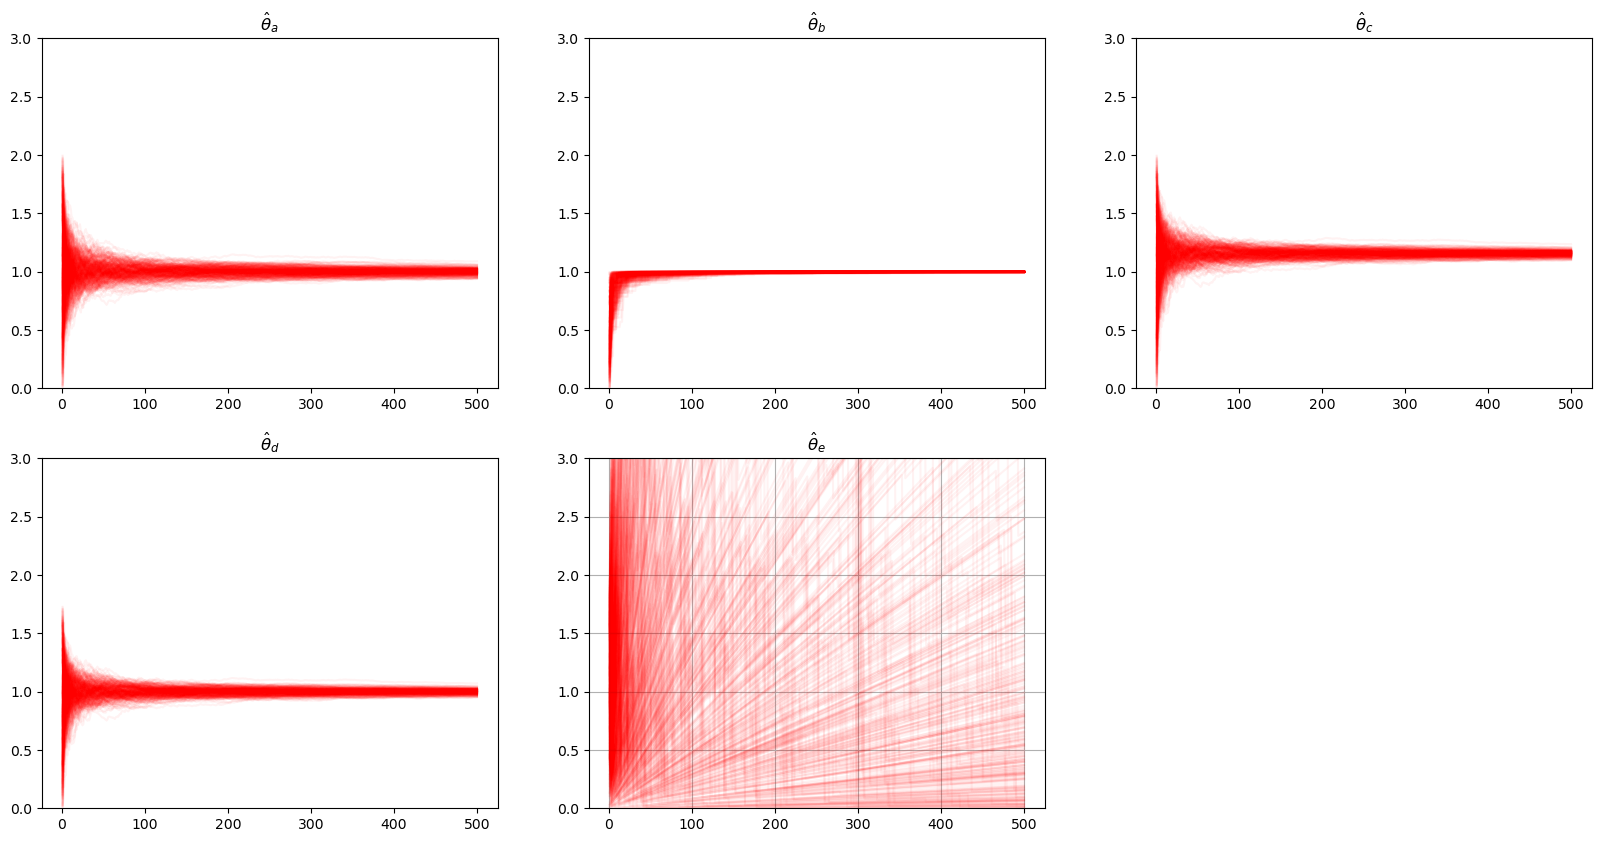

In [109]:
names = [r"$\hat{\theta}_a$", r"$\hat{\theta}_b$", r"$\hat{\theta}_c$", r"$\hat{\theta}_d$", r"$\hat{\theta}_e$"]
plt.figure(figsize=(20,10))
for i in range(5):
    plt.subplot(2,3,i+1)    
    for j in range(300):
        plt.plot(n, estimations[i][j], alpha=0.05, color='r')
        plt.title(f"{names[i]}")
    plt.ylim(0,3)
plt.grid(True) 
plt.show()

Укажите, для каких оценок, судя по графику, наблюдается свойство состоятельности:

In [110]:
consistent_estimators = {"a", "b", "d"}

In [111]:
assert isinstance(consistent_estimators, set)
assert consistent_estimators <= {"a", "b", "c", "d", "e"}
# А тут скрытые assert'ы :)